#EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

print("\n Dataset Shape")
print(df.shape)

print("\n Data Types")
print(df.dtypes)

print("\n Missing Values")
print(df.isnull().sum())


 Dataset Shape
(40000, 14)

 Data Types
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

 Missing Values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


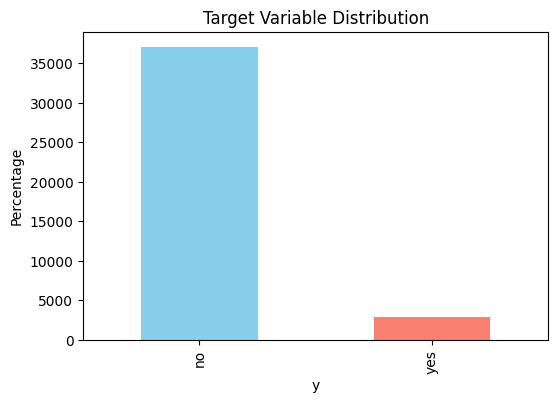

In [3]:
#Class Imbalance Check

plt.figure(figsize=(6,4))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Variable Distribution")
plt.ylabel("Percentage")
plt.show()


Summary Statistics
                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


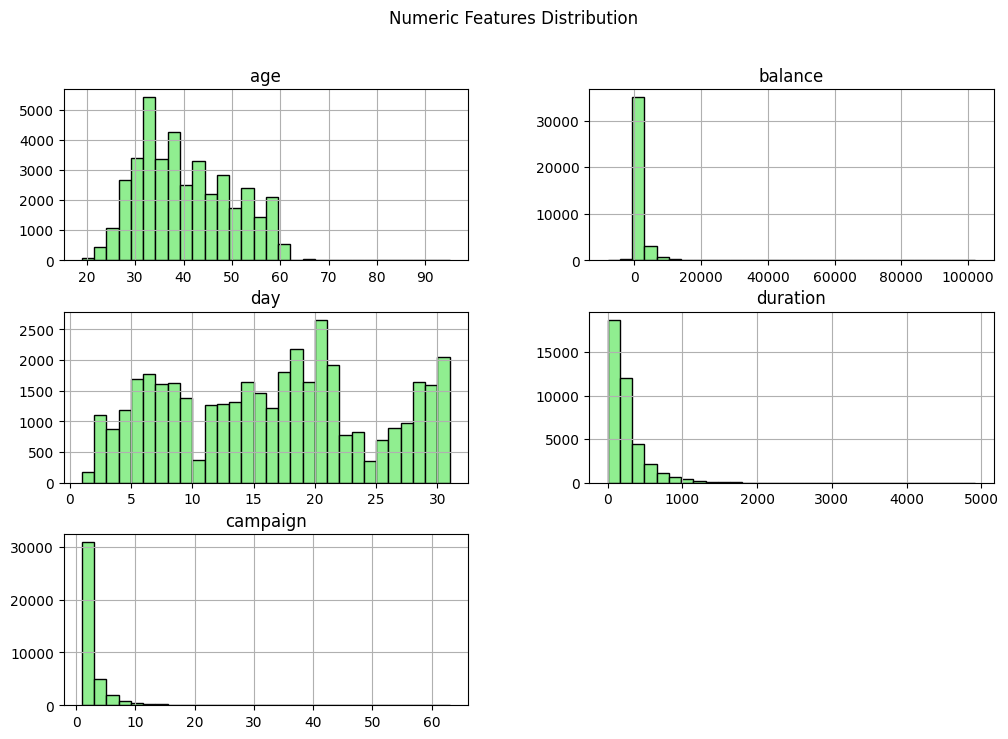

In [4]:
#Numeric Features Analysis

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nSummary Statistics")
print(df.describe())

#Histograms
df[numeric_cols].hist(bins=30, figsize=(12,8), color='lightgreen', edgecolor='black')
plt.suptitle("Numeric Features Distribution")
plt.show()

In [5]:
#Outliers using IQR

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers")

age: 79 outliers
balance: 4280 outliers
day: 0 outliers
duration: 3000 outliers
campaign: 2992 outliers


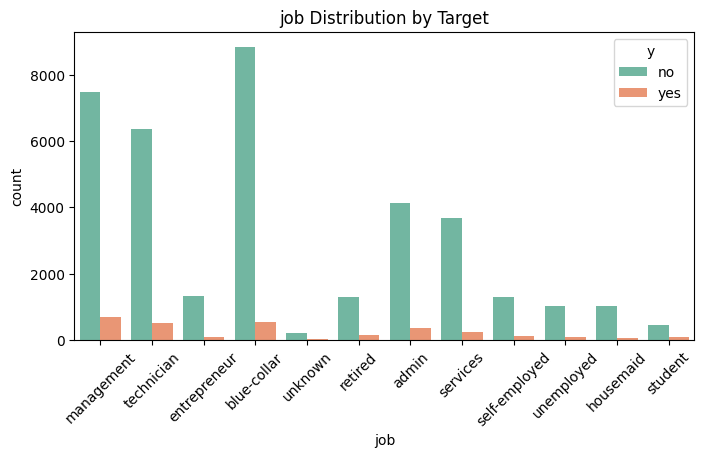

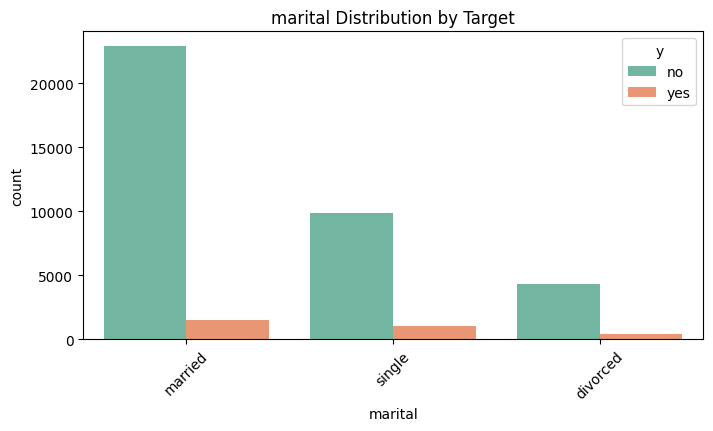

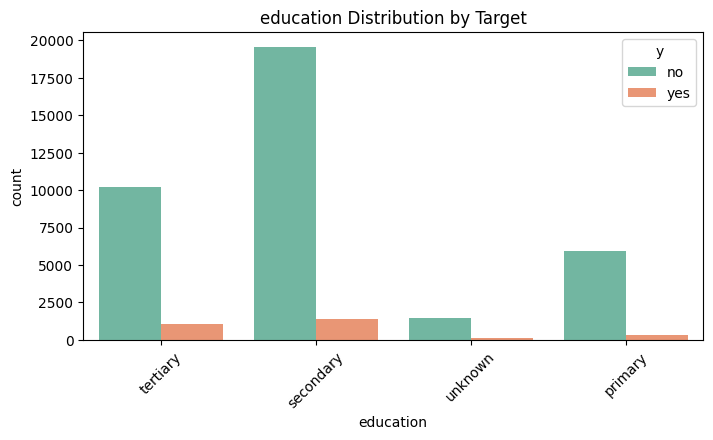

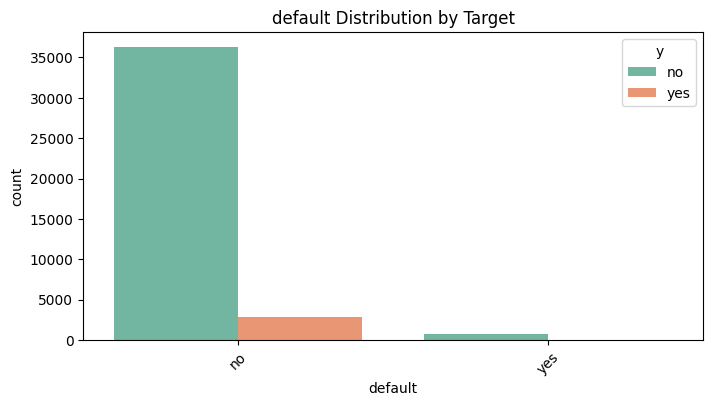

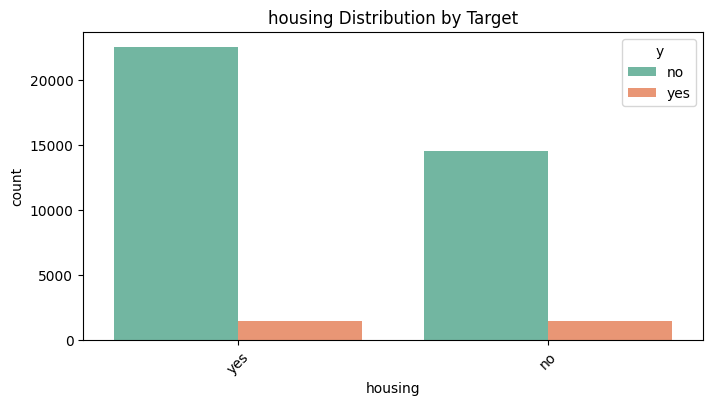

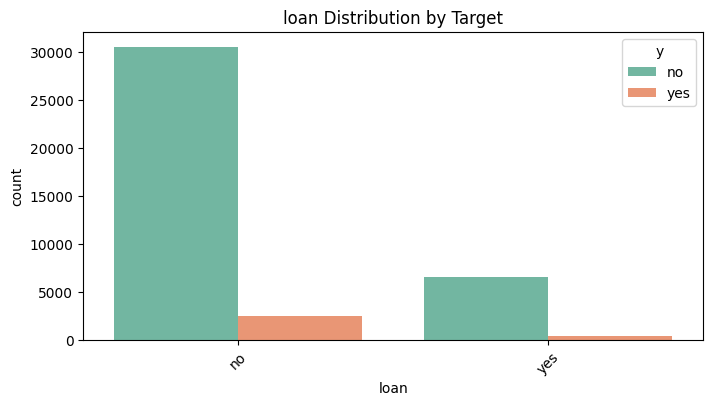

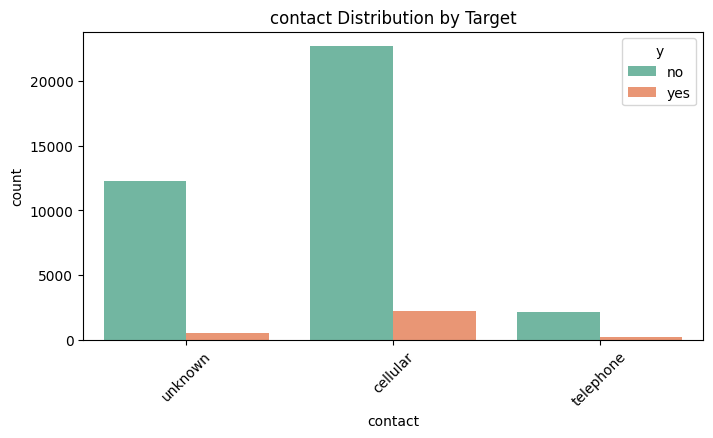

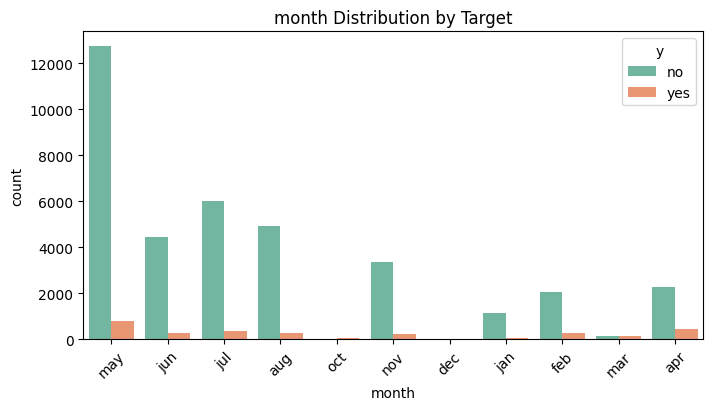

In [6]:
#Categorical Feature Analysis (Against Target)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f"{col} Distribution by Target")
    plt.xticks(rotation=45)
    plt.show()

In [7]:
#Chi Square Test

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['y'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")

job: p-value = 0.0000 (Significant)
marital: p-value = 0.0000 (Significant)
education: p-value = 0.0000 (Significant)
default: p-value = 0.2137 (Not Significant)
housing: p-value = 0.0000 (Significant)
loan: p-value = 0.0000 (Significant)
contact: p-value = 0.0000 (Significant)
month: p-value = 0.0000 (Significant)


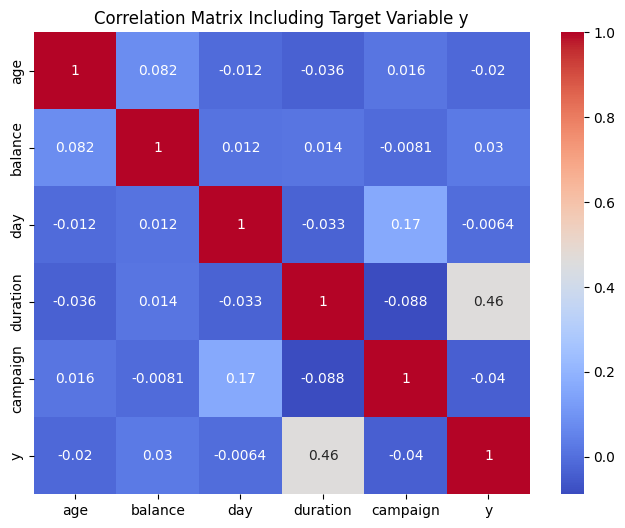

In [8]:
#Correlation Heatmap

df['y'] = df['y'].map({'no': 0, 'yes': 1})
y = df['y']

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numeric_cols + ['y']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix Including Target Variable y")
plt.show()

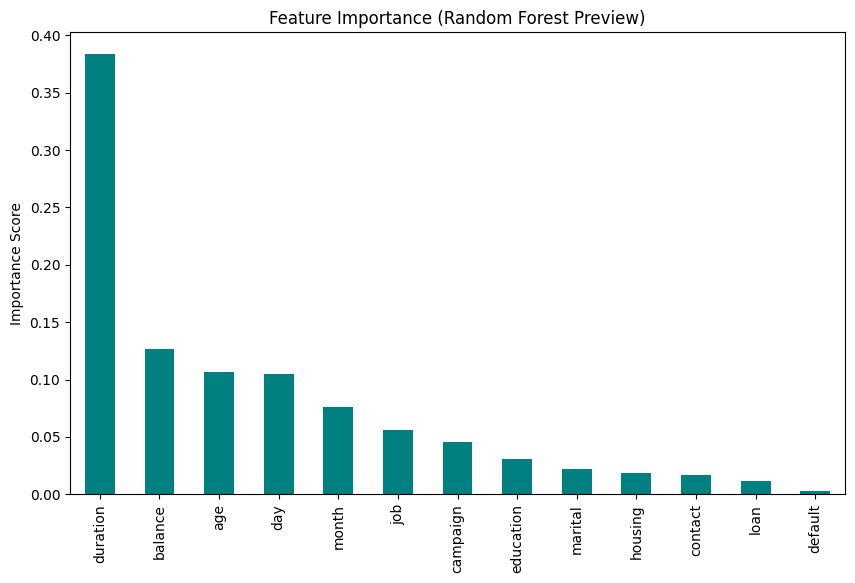

Top Features:
duration     0.383473
balance      0.126344
age          0.106270
day          0.104598
month        0.075646
job          0.055642
campaign     0.045627
education    0.030370
marital      0.022357
housing      0.018535
dtype: float64


In [9]:
#Feature Importance Assessment

df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols + ['y']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importance (Random Forest Preview)")
plt.ylabel("Importance Score")
plt.show()

print("Top Features:")
print(importances.head(10))


In [10]:
!pip install imblearn

#Logistic Regression

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler


df = pd.read_csv('term-deposit-marketing-2020.csv')
X = df.drop('y', axis=1)

df['y'] = df['y'].map({'no': 0, 'yes': 1})
y = df['y']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print((y).value_counts())

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

#Split column types
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'day']
skewed_cols = ['balance', 'duration', 'campaign'] #skewed features

y
0    37104
1     2896
Name: count, dtype: int64


In [59]:
#Preprocessing for numeric columns
numeric_transformer = ColumnTransformer(
    transformers=[
        ('skew', PowerTransformer(method='yeo-johnson'), skewed_cols),
        ('num', StandardScaler(), [col for col in numeric_cols if col not in skewed_cols])
    ],
    remainder='drop'
)

#Preprocessing for categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop=None)

#Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

#Build full pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np

#5-fold cross-validation on training set
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.92426887 0.92047083 0.92496245 0.92400489 0.92470174]
Mean CV accuracy: 0.9236817551472614
Standard deviation: 0.0016394929595672958


In [61]:
from sklearn.model_selection import cross_val_score
import numpy as np

#5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_weighted')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.8967281  0.84994256 0.86968629 0.34853968 0.78748006]
Mean CV accuracy: 0.7504753397807896
Standard deviation: 0.20416487288822024


In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

#Fit the model
pipeline.fit(X_train, y_train)

#Predict
y_pred = pipeline.predict(X_val)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[10976   155]
 [  599   270]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11131
           1       0.64      0.31      0.42       869

    accuracy                           0.94     12000
   macro avg       0.79      0.65      0.69     12000
weighted avg       0.93      0.94      0.93     12000



#Random Forest

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Preprocessing
'''numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])'''

numeric_transformer = ColumnTransformer(
    transformers=[
        ('skew', PowerTransformer(method='yeo-johnson'), skewed_cols),
        ('num', StandardScaler(), [col for col in numeric_cols if col not in skewed_cols])
    ],
    remainder='drop'
)

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [64]:
#Define the Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=14,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

#Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

In [65]:
from sklearn.model_selection import StratifiedKFold
#Cross-validation on entire dataset

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_macro')
print(f"5-Fold CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

5-Fold CV Accuracy Scores: [0.74154638 0.74518194 0.73989426 0.73474753 0.74388258]
Mean CV Accuracy: 0.7411


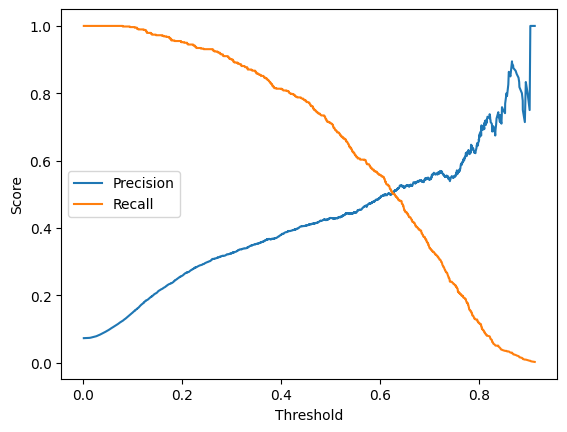

Best threshold: 0.4875270769351288
Confusion Matrix:
[[6847  574]
 [ 154  425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7421
           1       0.43      0.73      0.54       579

    accuracy                           0.91      8000
   macro avg       0.70      0.83      0.74      8000
weighted avg       0.94      0.91      0.92      8000



In [21]:
from sklearn.metrics import precision_recall_curve

#Train on full training data
pipeline.fit(X_train, y_train)

#Evaluate on test set
y_proba = pipeline.predict_proba(X_val)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba)

#Plot precision and recall scores against threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

#Choose threshold where F1 is max
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[f1_scores.argmax()]
print("Best threshold:", best_thresh)

y_pred = np.where(y_proba >= best_thresh, 1, 0)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

#XGBoost

In [22]:
!pip install XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#Define XGBoost classifier
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    #scale_pos_weight= len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42,
    eval_metric='logloss',
)
#Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb)
])

In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Cross-validation on entire dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_macro')
print(f"5-Fold CV F1 Scores: {cv_scores}")
print(f"Mean CV F1: {cv_scores.mean():.4f}")

5-Fold CV F1 Scores: [0.75680687 0.75036022 0.73842003 0.74417466 0.74918143]
Mean CV F1: 0.7478


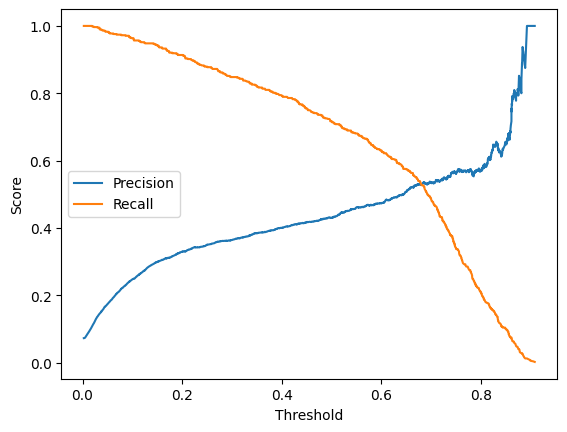

Best threshold: 0.5511517
Confusion Matrix:
[[6962  459]
 [ 185  394]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7421
           1       0.46      0.68      0.55       579

    accuracy                           0.92      8000
   macro avg       0.72      0.81      0.75      8000
weighted avg       0.94      0.92      0.93      8000



In [25]:
from sklearn.metrics import precision_recall_curve

#Fit on training data
pipeline.fit(X_train, y_train)

#Predict
y_proba = pipeline.predict_proba(X_val)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba)

#Plot precision and recall scores against threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

#Choose threshold where F1 is max
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[f1_scores.argmax()]
print("Best threshold:", best_thresh)

y_pred = np.where(y_proba >= best_thresh, 1, 0)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

#Hyperparameter Tuning for XGBoost

###Random Search

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

#Define model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='mlogloss',
    use_label_encoder=False
)

#Define search space
param_dist = {
    'n_estimators': np.arange(500, 1000, 25),      #steps of 25
    'max_depth': np.arange(7, 13, 1),             #Initially 3-10, tried 7-13 as first run gave 9 as optimum
    'learning_rate': np.linspace(0.01, 0.3, 30),  #Small steps from 0.01 to 0.3
    'subsample': np.linspace(0.7, 1.0, 6),        #Initially 0.5 to 1.0 in steps of ~0.1, narrowed it down to 0.7-1.0 in steps of ~0.05 in 2nd round
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 5, 22),               #0 to 5 in steps of ~0.25
    'reg_alpha': np.linspace(1, 3, 11),            #Initially 0 to 2 in steps of 0.25
    'reg_lambda': np.linspace(1, 5, 11)         #Initially 0.5 to 3 in steps of 0.25
}

#Scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')

#Randomized search
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_dist,
    n_iter = 50,
    scoring = f1_macro_scorer,
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', random_search)
])

#Fit on training data
pipeline.fit(X_train, y_train)

#Best parameters and score
print("Best Parameters from RandomizedSearch:", random_search.best_params_)
print("Best f1_macro Score from RandomizedSearch:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:13:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters from RandomizedSearch: {'subsample': np.float64(0.7), 'reg_lambda': np.float64(1.4), 'reg_alpha': np.float64(1.0), 'n_estimators': np.int64(550), 'max_depth': np.int64(9), 'learning_rate': np.float64(0.15), 'gamma': np.float64(3.095238095238095), 'colsample_bytree': np.float64(0.8)}
Best f1_macro Score from RandomizedSearch: 0.7348076359085755


###Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='mlogloss',
    use_label_encoder=False
)

#Refined grid based on RandomizedSearch results:
#I had 3 values each for every parameter, but did a 3-step search, fixing the optimum values at every step, hence the single values for each parameter
param_grid = {
    'n_estimators': [600],
    'max_depth': [9],
    'learning_rate': [0.15],
    'reg_lambda': [1.6],
    'reg_alpha': [0.8],
    'gamma': [3.2],
    'colsample_bytree': [0.8],
    'subsample': [0.65]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',
    n_jobs=-1,
    cv=5,
    verbose=2
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', grid_search)
])

#Fit
pipeline.fit(X_train, y_train)

print("Best Parameters from GridSearch:", grid_search.best_params_)
print("Best f1_macro Score from GridSearch:", grid_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:31:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters from GridSearch: {'colsample_bytree': 0.8, 'gamma': 3.2, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 600, 'reg_alpha': 0.8, 'reg_lambda': 1.6, 'subsample': 0.65}
Best f1_macro Score from GridSearch: 0.7327576566263722


In [79]:
from imblearn.pipeline import Pipeline as ImbPipeline

#Refitting with tuned hyperparameters
xgb = XGBClassifier(
    n_estimators = 600,
    learning_rate = 0.15,
    max_depth = 9,
    reg_lambda = 1.6,
    reg_alpha = 0.8,
    gamma = 3.2,
    colsample_bytree = 0.8,
    subsample = 0.65,
    random_state=42,
    eval_metric='logloss',
)

#Pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb)
])

In [80]:
#Cross-validation on entire dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_macro', error_score = 'raise')
print(f"5-Fold CV F1 Scores: {cv_scores}")
print(f"Mean CV F1: {cv_scores.mean():.4f}")

5-Fold CV F1 Scores: [0.76141976 0.7571088  0.76130793 0.75686474 0.76236398]
Mean CV F1: 0.7598


In [81]:
#Fit on training data
pipeline.fit(X_train, y_train)

#Predict
y_proba = pipeline.predict_proba(X_val)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba)

#Choose threshold where F1 is max
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[f1_scores.argmax()]
print("Best threshold:", best_thresh)

y_pred = np.where(y_proba >= best_thresh, 1, 0)

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Best threshold: 0.36567014
Confusion Matrix:
[[10487   644]
 [  255   614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11131
           1       0.49      0.71      0.58       869

    accuracy                           0.93     12000
   macro avg       0.73      0.82      0.77     12000
weighted avg       0.94      0.93      0.93     12000

